## **librarires**

In [ ]:
import numpy as np
import random
import math
import numpy as np
from copy import deepcopy
from copy import copy
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import random
import matplotlib.pyplot as plt

%matplotlib inline

## **Load and plot Data**

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/AI Class Project 1/qa194.tsp') as f:
    file = f.read().split("\n")
    coords = []
    for i in file:
        a , b, c = i.split()
        coords.append([b,c])
print(coords)

[['24748.3333', '50840.0000'], ['24758.8889', '51211.9444'], ['24827.2222', '51394.7222'], ['24904.4444', '51175.0000'], ['24996.1111', '51548.8889'], ['25010.0000', '51039.4444'], ['25030.8333', '51275.2778'], ['25067.7778', '51077.5000'], ['25100.0000', '51516.6667'], ['25103.3333', '51521.6667'], ['25121.9444', '51218.3333'], ['25150.8333', '51537.7778'], ['25158.3333', '51163.6111'], ['25162.2222', '51220.8333'], ['25167.7778', '51606.9444'], ['25168.8889', '51086.3889'], ['25173.8889', '51269.4444'], ['25210.8333', '51394.1667'], ['25211.3889', '51619.1667'], ['25214.1667', '50807.2222'], ['25214.4444', '51378.8889'], ['25223.3333', '51451.6667'], ['25224.1667', '51174.4444'], ['25233.3333', '51333.3333'], ['25234.1667', '51203.0556'], ['25235.5556', '51330.0000'], ['25235.5556', '51495.5556'], ['25242.7778', '51428.8889'], ['25243.0556', '51452.5000'], ['25252.5000', '51559.1667'], ['25253.8889', '51535.2778'], ['25253.8889', '51549.7222'], ['25256.9444', '51398.8889'], ['25263.6

## defind SA class

In [ ]:

class SimAnneal(object):
    def __init__(self, coords):
        self.coords = coords
        self.N = len(coords)
        self.T = math.sqrt(self.N)
        self.factor = 0.99
        self.cost_value = []
        self.best_cost = float("Inf")
        self.nodes = [i for i in range(self.N)]
        self.best_solution = None
                  

    def initial_solution(self):
        """
        This function makes initial solution
        """
        current_node = random.choice(self.nodes)  # In ths line of code a node randomly choosed
        solution = [current_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(current_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.dist(current_node, x))  # nearest neighbour
            free_nodes.remove(next_node)
            solution.append(next_node)
            current_node = next_node

        current_cost = self.cost(solution)
        if current_cost < self.best_cost:  # If best found so far, update best cost
            self.best_cost = current_cost
            self.best_solution = solution
        self.cost_value.append(current_cost)
        return solution, current_cost

    def dist(self, point1, point2):
      """
      this fuction computs disance between to point
      """

      coord0, coord1 = self.coords[point1], self.coords[point2]

      dis = np.sqrt(np.square(float(coord0[0]) - float(coord1[0]))+ np.square(float(coord0[1]) - float(coord1[1])))

      return dis
        

    def cost(self, solution):
        """
        This function computes road length
        """
        current_cost = 0
        for i in range(self.N):
            current_cost += self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return current_cost

    def find_neighbour(self):
      """
      this fuction finds neighbor
      """
      neighbour = list(self.current_solution)
      l = random.randint(2, self.N - 1)
      i = random.randint(0, self.N - l)
      neighbour[i : (i + l)] = reversed(neighbour[i : (i + l)])

      return neighbour


    def SA(self):

        self.current_solution, self.current_cost = self.initial_solution() #make Initial solutaion

        for i in range(5000):

            neighbour = self.find_neighbour()
            neighbour_cost = self.cost(neighbour)


            if neighbour_cost < self.current_cost:
              self.current_cost, self.current_solution = neighbour_cost, neighbour
            if neighbour_cost < self.best_cost:
                self.best_cost, self.best_solution = neighbour_cost, neighbour
            else:
              if random.random() < np.exp(-(neighbour_cost - self.current_cost) / self.T):
                self.current_cost, self.current_solution = neighbour_cost, neighbour


            self.T *= self.factor # updating Tempreture

            self.cost_value.append(self.current_cost) # add cost value to this to plot it

        print(f"Best cost is: {self.best_cost}")
       
    def plot_figure(self):
        plt.plot([i for i in range(len(self.cost_value))], self.cost_value, "black")
        plt.ylabel("cost")
        plt.xlabel("Iteration")
        plt.show()

Best cost is: 11110.109587945873


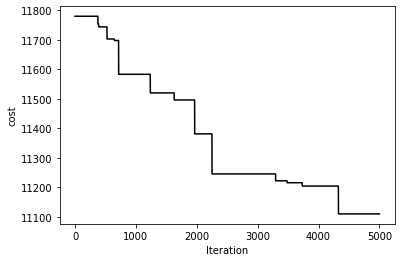

In [ ]:
if __name__ == "__main__":
    sa = SimAnneal(coords)
    sa.SA()
    sa.plot_figure()
    